In [ ]:
# Summary

# load experimental data
# normalize experimental data
# Handle class imbalance using Smote
# use train test split, and DecisionTreeClassifier to train the model
# load dummy dataset which is mine
# predict this dataset using the model that we defined
# check results, and decision tree as an img

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the experimental dataset (with "Class" column)
df_exp = pd.read_csv('../data/creditcard.csv')

# Drop duplicates
df_exp = df_exp.drop_duplicates()

# Normalizing the "Amount" column
scaler = StandardScaler()
df_exp["Normalized_Amount"] = scaler.fit_transform(df_exp["Amount"].values.reshape(-1, 1))

# Drop the original "Amount" column (optional)
df_exp = df_exp.drop(["Amount"], axis=1)

In [3]:
# Fetching the target feature ("Class")
Y_exp = df_exp["Class"]

# Fetching the independent features (dropping "Class")
X_exp = df_exp.drop(["Class"], axis=1)

# Handle class imbalance using SMOTE
X_balance, Y_balance = SMOTE().fit_resample(X_exp, Y_exp)

# Split the experimental data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_balance, Y_balance, test_size=1/3, random_state=42)

# Initialize and train the decision tree classifier
dt_model_exp = DecisionTreeClassifier(random_state=42)
dt_model_exp.fit(X_train, Y_train)
print('Model trained.')

Model trained.


In [4]:
## ----
# Load my dummy dataset (without "Class" column)
df = pd.read_csv('../data/credit_card_fraud_data.csv')

# Drop duplicates
df = df.drop_duplicates()

# Normalizing the "Amount" column
df["Normalized_Amount"] = scaler.transform(df["Amount"].values.reshape(-1, 1))

df = df.drop(columns=['Amount'])

# Now predict the "Class" for your dataset using the trained model
predicted_class = dt_model_exp.predict(df)

# Adding the predicted "Class" as a new column to your dataset
df['Predicted_Class'] = predicted_class

# Display the first few rows to see the predicted results
df['Predicted_Class'].value_counts()

Predicted_Class
0    985
1     15
Name: count, dtype: int64

In [8]:
# Display only fraudulent transactions
fraudulent_transactions = df[df['Predicted_Class'] == 1]

# Display original values and predicted class
fraudulent_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Normalized_Amount,Predicted_Class,True_Class
4,5.0,0.004960,-1.891662,0.444574,1.320108,0.498410,0.061330,2.048006,-1.157922,-1.028235,...,0.552765,2.088462,0.139472,-1.113159,0.724724,0.656567,1.869401,2.915748,1,0
37,38.0,18.465851,11.760188,-14.543438,12.088604,6.144865,5.199271,-9.605924,-9.032118,-8.875269,...,20.188870,0.624785,-3.092779,-6.332489,4.632516,-7.483397,-5.818175,35.745347,1,1
163,164.0,1.399014,1.545705,0.082884,1.594041,-1.550543,-1.006601,0.688419,-0.028172,0.055235,...,-0.661073,0.202105,-1.966070,-0.225361,0.404785,-0.063335,0.130782,0.064957,1,0
345,346.0,-0.243972,-0.556091,-0.612509,-0.412342,-0.328138,-0.719666,-0.489200,1.214354,1.220449,...,0.216977,-0.346261,1.166909,0.461664,-0.479913,-0.675035,-2.079999,-0.173052,1,0
538,539.0,-1.415347,-0.243091,-0.020784,1.418435,0.398667,-1.642306,-1.417831,1.818165,-0.446706,...,-1.291992,-0.046989,0.957347,1.119323,0.551650,-0.317060,-2.448286,-0.004404,1,0


In [9]:
# Simulate true labels based on some condition
# Assuming that any normalized amount above a certain threshold is fraudulent
threshold = 5.0  # Example threshold; adjust based on your logic
df['True_Class'] = (df['Normalized_Amount'] > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(df['True_Class'], predicted_class)
precision = precision_score(df['True_Class'], predicted_class)
recall = recall_score(df['True_Class'], predicted_class)
f1 = f1_score(df['True_Class'], predicted_class)

# Print evaluation metrics
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))

Accuracy: 0.97000
Precision: 0.20000
Recall: 0.14286
F1-score: 0.16667


In [ ]:
# Visualization of the Decision Tree with 3 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True,
          max_depth=1)  # Limit the depth here
plt.title("Decision Tree Visualization (3 Limited Depth)")
plt.show()

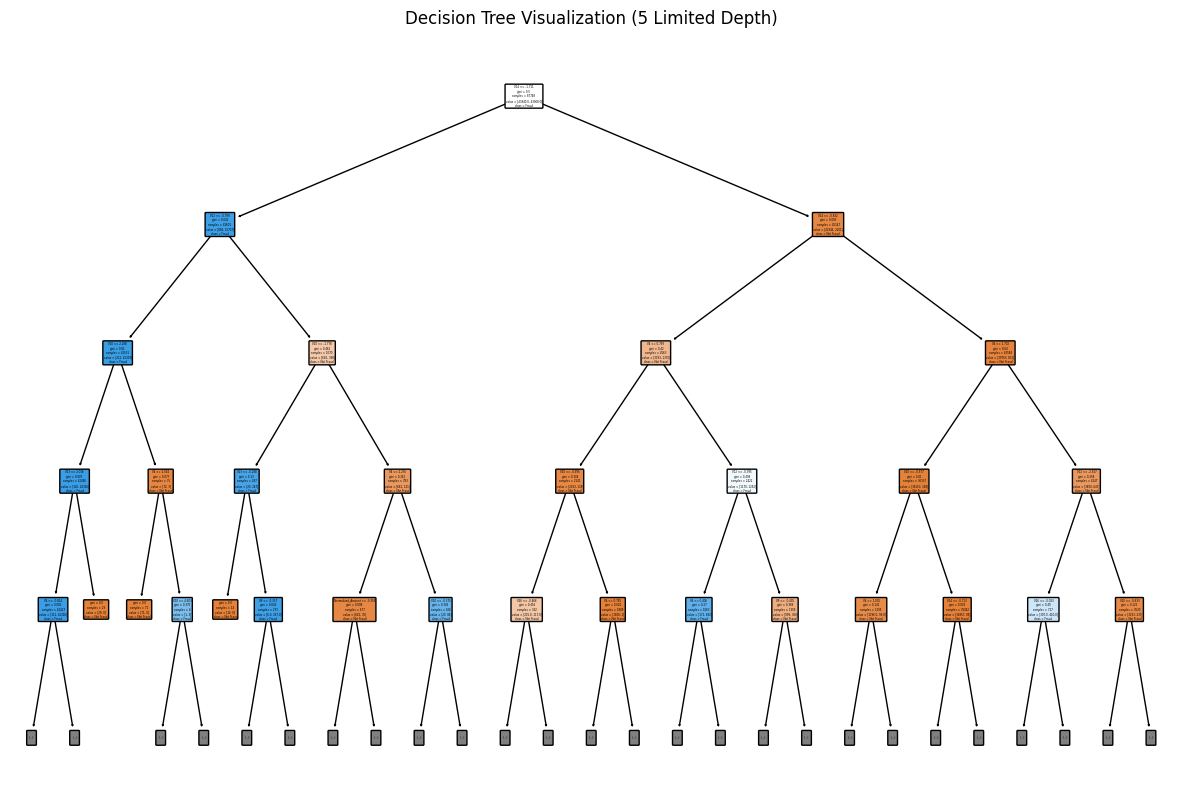

In [13]:
# Visualization of the Decision Tree with 5 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True,
          max_depth=4)  # Limit the depth here
plt.title("Decision Tree Visualization (5 Limited Depth)")
plt.show()

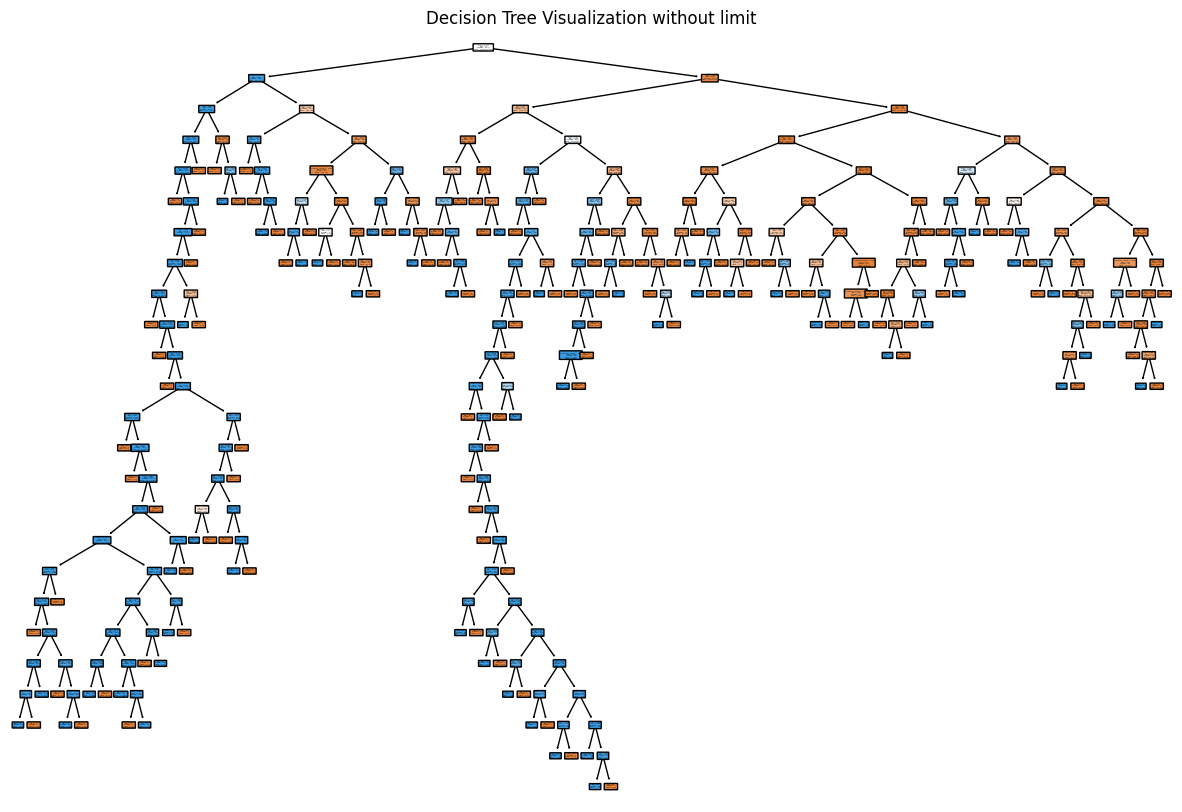

In [12]:
# Visualization of the Decision Tree with 5 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True)
plt.title("Decision Tree Visualization without limit")
plt.show()